### Applying Feature Scaling in Python

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data
heights = np.array([[170], [180], [190]])

scaler = StandardScaler()
scaled_heights = scaler.fit_transform(heights)
print(heights, scaled_heights)

[[170]
 [180]
 [190]] [[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]


In [6]:
import pandas as pd
import numpy as np

In [7]:
NAC_data = pd.read_csv('NAC_data.csv')
NAC_df = pd.DataFrame(NAC_data)

#### Standardization

Scales the data based on the standard deviation and mean of the feature.

In [8]:
columns_to_standardize = ['Height', 'Weight']

# Selecting the specified columns from NAC_df
subset_df = NAC_df[columns_to_standardize]

#Mean and standard deviation of the dataset
NAC_height_mean = np.mean(NAC_df['Height'])
NAC_weight_mean = np.mean(NAC_df['Weight'])
NAC_height_std_dev = np.std(NAC_df['Height'])
NAC_weight_std_dev = np.std(NAC_df['Weight'])
print(f'Height mean and std dev., respectivelly, is {NAC_height_mean, NAC_height_std_dev}')
print(f'Weight mean and std.dev., respectivelly, is {NAC_weight_mean, NAC_weight_std_dev}')

# Initializing the StandardScaler
std_scaler = StandardScaler()

# Fitting the scaler to the selected columns and transforming the data
scaled_data = std_scaler.fit_transform(subset_df)

# Creating a new DataFrame with the standardized data
df_standardized = pd.DataFrame(scaled_data, columns=columns_to_standardize)
print(f"\nStandardized DataFrame:\n {df_standardized}")


Height mean and std dev., respectivelly, is (159.9469609918355, 59.96734646421222)
Weight mean and std.dev., respectivelly, is (62.67112186271545, 28.709153875018696)

Standardized DataFrame:
          Height    Weight
0      0.434454  0.394609
1      0.267696  0.429441
2      0.367751  0.533937
3      0.384427  0.359776
4      0.334399  0.429441
...         ...       ...
16530 -2.667234 -2.182967
16531 -2.667234 -2.182967
16532  0.217669  0.150784
16533  0.434454  0.499105
16534  0.517832  0.568769

[16535 rows x 2 columns]


### Min-Max Normalization

Scales the data to a fixed range.

In [9]:
from sklearn.preprocessing import MinMaxScaler
# Initializing the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fitting the scaler to the selected columns and transforming the data
mm_data = min_max_scaler.fit_transform(subset_df)

# Creating a new DataFrame with the standardized data
df_min_maxed_scaled = pd.DataFrame(mm_data, columns=columns_to_standardize)
print(f"\n Min-max scaled DataFrame:\n {df_min_maxed_scaled}")


 Min-max scaled DataFrame:
          Height    Weight
0      0.902913  0.718447
1      0.854369  0.728155
2      0.883495  0.757282
3      0.888350  0.708738
4      0.873786  0.728155
...         ...       ...
16530  0.000000  0.000000
16531  0.000000  0.000000
16532  0.839806  0.650485
16533  0.902913  0.747573
16534  0.927184  0.766990

[16535 rows x 2 columns]


#### Robust Scaling

Scales the data to reduce the influence of outliers.

In [10]:
from sklearn.preprocessing import RobustScaler
# Initializing the RobustScaler
rb_scaler = RobustScaler()

# Fitting the scaler to the selected columns and transforming the data
robust_data = rb_scaler.fit_transform(subset_df)

# Creating a new DataFrame with the standardized data
df_robustlyscaled = pd.DataFrame(robust_data, columns=columns_to_standardize)
print(f"\n Robustly scaled DataFrame:\n {df_robustlyscaled}")


 Robustly scaled DataFrame:
           Height    Weight
0       0.454545  0.000000
1      -0.454545  0.083333
2       0.090909  0.333333
3       0.181818 -0.083333
4      -0.090909  0.083333
...          ...       ...
16530 -16.454545 -6.166667
16531 -16.454545 -6.166667
16532  -0.727273 -0.583333
16533   0.454545  0.250000
16534   0.909091  0.416667

[16535 rows x 2 columns]


#### Max Abs Scaling

Scales each feature by uts maximum absolute value.

In [11]:
from sklearn.preprocessing import MaxAbsScaler
# Initializing the MaxAbsScaler
max_scaler = MaxAbsScaler()

# Fitting the scaler to the selected columns and transforming the data
maxed_abs_data = max_scaler.fit_transform(subset_df)

# Creating a new DataFrame with the standardized data
df_max_abs_scaled = pd.DataFrame(maxed_abs_data, columns=columns_to_standardize)

# Finding rows where all values are 0 using .iloc
zero_rows = df_max_abs_scaled.iloc[:, 1:].index[df_max_abs_scaled.iloc[:, 1:].eq(0).all(axis=1)]

# Dropping rows with all 0 values
df_max_abs_scaled = df_max_abs_scaled.drop(index=zero_rows)
print(f"\n Maxed absolute DataFrame:\n {df_max_abs_scaled}")


 Maxed absolute DataFrame:
          Height    Weight
0      0.902913  0.718447
1      0.854369  0.728155
2      0.883495  0.757282
3      0.888350  0.708738
4      0.873786  0.728155
...         ...       ...
16528  0.873786  0.728155
16529  0.868932  0.689320
16532  0.839806  0.650485
16533  0.902913  0.747573
16534  0.927184  0.766990

[13777 rows x 2 columns]


There are players in the dataset whose heights and weights are 0. I decided to remove the subsequent rows.

### Correlation and experimental design (DataCamp)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
NAC_df['Height'].corr(NAC_df['Weight'])

0.8252977750463033

The high and positive correlation coefficient indicates a strong relationship between players' height and weight, where as height increases, so does weight.

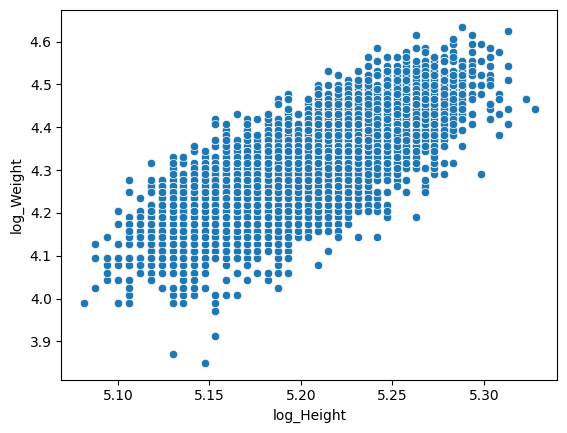

In [14]:
# Finding rows where all values are 0 using .iloc
zero_rows = NAC_df.iloc[:, 1:].index[NAC_df.iloc[:, 1:].eq(0).all(axis=1)]

# Dropping rows with all 0 values and with negative values
NAC_modified = NAC_df.drop(index=zero_rows)
NAC_modified = NAC_modified[(NAC_modified['Height'] > 0) & (NAC_modified['Weight'] > 0)]

#Because the data is highly skewed, I decided to use log
NAC_modified['log_Height'] = np.log(NAC_modified['Height'])
NAC_modified['log_Weight'] = np.log(NAC_modified['Weight'])

# Creating a scatterplot of height vs. weight
sns.scatterplot(x = 'log_Height', y = 'log_Weight', data = NAC_modified)

# Show plot
plt.show()

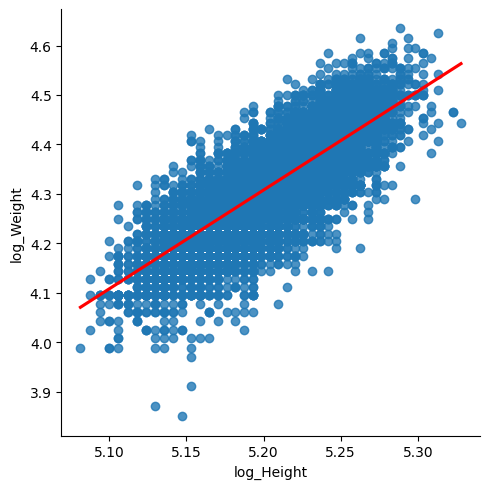

In [15]:
# Creating a scatterplot of height vs. weight, with trendline
sns.lmplot(x = 'log_Height', y = 'log_Weight', data = NAC_modified, ci = None, line_kws={'color': 'red'})
plt.show()

#### Supervised Learning with scikit-learn (DataCamp)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Classification (K Nearest Neighbor)

The columns that I want to use contain NaN values, so I used imputation to handle the missing values.

In [17]:
x_columns = ['Age', 'Aerial duels per 90']
y_column = 'Market value'

# Extracting features and target
x = NAC_df[x_columns].values
y = NAC_df[y_column].values

# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

In [18]:
# Installing K Nearest Neighbor Classifier model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_imputed,y)

KNeighborsClassifier(n_neighbors=15)

In [19]:
# Applying the model
X_new = np.array([[56.8, 17.5],                  
                  [24.4, 24.1],                  
                  [50.1, 10.9]])
predictions = knn.predict(X_new)
print('Market value predictions: {}'.format(predictions))

Market value predictions: [ 50000 100000  50000]


Measuring model performance

In [20]:
numerical_columns = NAC_df.select_dtypes(include='number')

# Create a new DataFrame with only numerical columns
numerical_df = pd.DataFrame(data=numerical_columns)
X = numerical_df.drop("Market value", axis=1).values
y = numerical_df["Market value"].values

# Or drop rows with missing values
numerical_df.dropna(inplace=True)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=None)
knn = KNeighborsClassifier(n_neighbors=15)

# Fitting the classifier to the training data
knn.fit(X_train,y_train)

print(knn.score(X_test, y_test))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Regression

In [ ]:
X = NAC_df.drop("Goals", axis=1).values #Extracting features without the "Goals" column
y = NAC_df["Goals"].values #Target variable

# Extracting a specific column ("Market Value") from X and reshaping it to a 2D array
X_market_val = X[:, 12]
X_market_val = X_market_val.reshape(-1, 1)

print(y.shape, X_market_val.shape)

(16535,) (16535, 1)


In [ ]:
# Wanted to check the correlation coefficient of the two
NAC_df['xG'].corr(NAC_df['Goals'])

0.9047801253945993

Text(0, 0.5, 'Actual Goals')

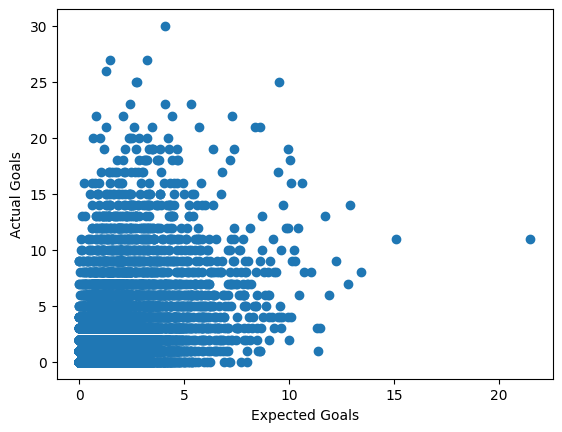

In [ ]:
plt.scatter(X_market_val, y)
plt.xlabel('Expected Goals')
plt.ylabel('Actual Goals')

Text(0, 0.5, 'Actual Goals')

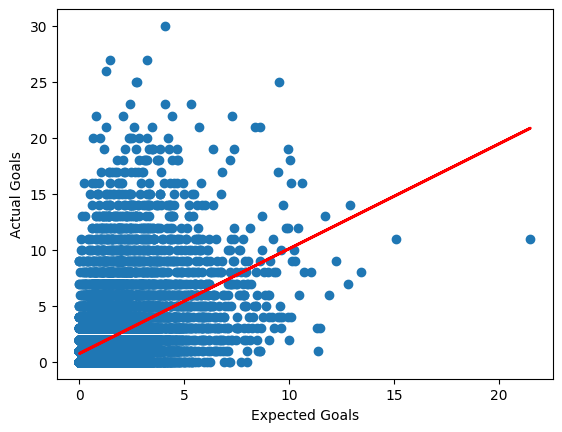

In [ ]:
# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.reshape(-1, 1))


# Creating a Linear Regression model and fitting it to the data, then making predictions
reg = LinearRegression()
reg.fit(X_market_val, y_imputed)
predictions = reg.predict(X_market_val)

#Scatter plot of the actual values and the regression line
plt.scatter(X_market_val,y_imputed)
plt.plot(X_market_val, predictions, color='red', linewidth=2)
plt.xlabel('Expected Goals')
plt.ylabel('Actual Goals')

In [ ]:
# R-squared
reg.score(X_market_val, y)

0.22130895780554116

The features only explain about 22% of Goals variance.

In [ ]:
#MSE
mse = mean_squared_error(y, predictions, squared = False)
print(mse)

2.5074134947183695


The model has an average error for Goals of around 2.5

### Cross-validation

(useful when the model is dependent on the way we split the data, therefore not being representative of its ability to generalize unseen data)

In [ ]:
# Creating a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_market_val, y_imputed, cv=kf)

# Print scores
print(cv_scores)

[0.23249537 0.20096492 0.20474765 0.2361869  0.24784875 0.2035034 ]


In [ ]:
print(np.mean(cv_scores))

0.22095783168903615


This means, on average, the squared differences between the predicted and actual values are relatively low, indicating that the model's predictions are closer to the actual values.

In [ ]:
print(np.std(cv_scores))

0.018508125211559857


This suggests that the individual cross-validated scores deviate from the mean by approximately 0.0185 on average. A low std dev,. suggests that the model is not highly sensitive to the specific composition of the training and test sets during cross-validation.

In [ ]:
print(np.quantile(cv_scores, [0.25, 0.975]))

[0.20381447 0.24639102]


We are 95% confident that the true performance metric (e.g., mean squared error) of the model falls within the range [0.20381447, 0.24639102].

### Regularized Regression

In [ ]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_market_val, y_imputed)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

Lasso

In [ ]:
# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()